# <font color='dark'>**Detecção de texto em placas de carro**</h1>

# <font color='dark'>**Aula 1**</h1>

### Instalação do tesseract

Necessário instalar o tesseract na máquina. Para baixar é preciso utilizar o comando `!sudo apt install tesseract-ocr`.

Informação disponível na [documentação do tesseract](https://tesseract-ocr.github.io/tessdoc/Installation.html)

Na mesma documentação é possível ver as linguagens disponíveis no [github](https://github.com/tesseract-ocr/tessdata). Para utilizar a língua portuguesa, precisamos usar o arquivo `por.tessdata`

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Para usar o tesseract com a linguagem python, devemos instalar o pacote `pytesseract`, disponível no [PyPI](https://pypi.org/project/pytesseract/).

In [2]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Podemos baixar diretamente o arquivo `por.tessdata` do [github](https://github.com/tesseract-ocr/tessdata) ou baixar diretamente para o Google Colab com o comando `wget`.

In [1]:
!mkdir tessdata

In [3]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata

--2023-06-19 21:59:08--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-06-19 21:59:09--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15336931 (15M) [application/octet-stream]
Saving to: ‘./tessdata/por.traineddata’

./tessdata/por.trai 100%[===================>]  14.63M  7.32MB/s    in 2.0s    

2023-06-19 21:59:11 (7.32 MB/s) - ‘./tessdata/por.traineddata’ saved [15336931/15336931]


### Importação das bibliotecas

In [4]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [5]:
cv2.__version__

'4.7.0'

In [6]:
pytesseract.__version__

'0.3.10'

### Leitura da imagem

In [7]:
img_names = ['trecho_livro', 'placa_carro1', 'placa_carro2', 'placa_carro3']

In [8]:
img = cv2.imread(f'./data/{img_names[0]}.png')

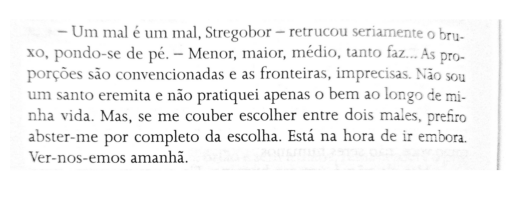

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [10]:
text = pytesseract.image_to_string(img)
print(text)

— Um mal é um mal, Stregobor — retrucou seriamente 0 bry.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porgdes sao convencionadas e as fronteiras, imprecisas.
um santo eremita e nao pratiquei apenas 0 bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Esta na hora de ir embora.
Ver-nos-emos amanha.

 

S pro-

40 SOU

 

 



In [11]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [12]:
config_tesseract = '--tessdata-dir tessdata --psm 6'

In [13]:
text = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
print(text)

— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. ;
Ver-nos-emos amanhã. |



In [14]:
img = cv2.imread(f'./data/{img_names[1]}.png')

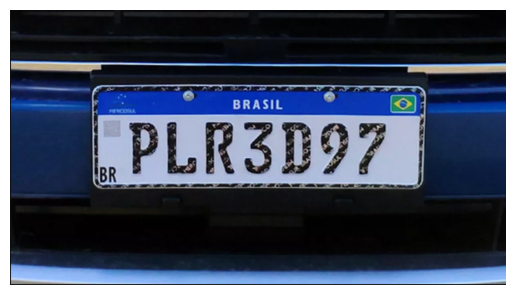

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

A biblioteca opencv importa as imagens com os canais BGR, como pode ser visto na [documentação](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html)

> **Note**

> *In the case of color images, the decoded images will have the channels stored in B G R order.*

O tesseract entende os canais na ordem RGB, portanto devemos fazer uma conversão da imagem de BGR para GRAY(escala de cinza), com o uso da função `cv2.cvtColor()`

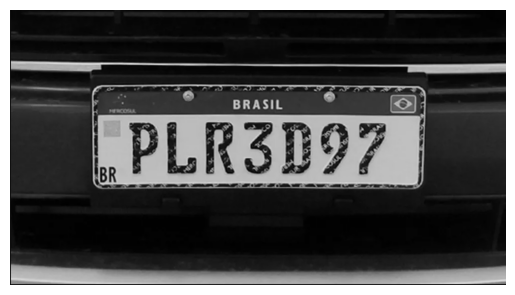

In [16]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [17]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
print(text)